# **DSFM Project**: Fraud detection & model evaluation (SOLUTION)

Creator: [Data Science for Managers - EPFL Program](https://www.dsfm.ch)  
Source:  [https://github.com/dsfm-org/code-bank.git](https://github.com/dsfm-org/code-bank.git)  
License: [MIT License](https://opensource.org/licenses/MIT). See open source [license](LICENSE) in the Code Bank repository. 

-------------

## Overview

In this project, we will explore different model evaluation metrics in the context of fraud detection.


First we define a __Data Generating Process__ (DGP) as a sigmoid function; then draw repeated samples from the DGP to allow for random variation; and finally we show the degree of __Bias__ and __Variance__ of the model at a given value of X. At the end of the project we can copare how the model performs at different levels of the polynomial expansion.  

-------------

## **Part 0**: Setup

### Import Packages

In [1]:
# Import packages
import lightgbm
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
# Constants
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'
THRESHOLDS = [i/100 for i in range(1, 101)]
SEED = 10

## **Part 1**: Exploratory data analysis

In [3]:
# Load data
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

train_df.shape

(52819, 44)

In [4]:
# Split into training and testing data
feature_names = [col for col in train_df.columns if col not in ['TransactionID','isFraud']]

X_train, y_train = train_df[feature_names], train_df['isFraud']
X_test, y_test = test_df[feature_names], test_df['isFraud']

## **Part 2**: Fit model

In [5]:
# Train model
model = lightgbm.LGBMClassifier(random_state=SEED)
model.fit(X_train, y_train)
    
# Evaluate model
y_test_pred = model.predict_proba(X_test)[:, 1]

print('The first 10 predictions ...')
y_test_pred[:10]

The first 10 predictions ...


array([7.55574011e-05, 5.40324879e-02, 4.22816733e-02, 3.03902314e-02,
       1.22004713e-04, 9.76876524e-03, 1.38160193e-04, 1.08642948e-04,
       5.64559523e-02, 1.30052466e-04])

## **Part 3**: Compare evaluation metrics

### __a)__: Accuracy

$\frac{TP + TN}{TP + FP + TN + FN}$

In [6]:
scores = []
for t in THRESHOLDS: 
    y_test_pred_binary = [int(i >= t) for i in y_test_pred]
    scores.append(accuracy_score(y_test, y_test_pred_binary))
    
max_t = THRESHOLDS[np.argmax(scores)]
y_test_pred_binary = [int(i >= max_t) for i in y_test_pred]
print('Maximum accuracy of {}% at threshold {}'.format(round(max(scores), 2), max_t))


Maximum accuracy of 0.96% at threshold 0.41


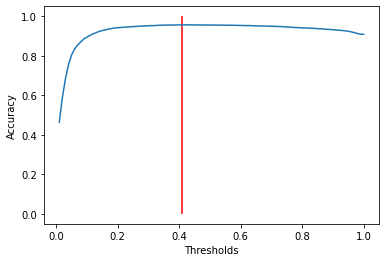

In [7]:
# Plot scores
plt.plot(THRESHOLDS, scores)
plt.vlines(max_t, ymin=0, ymax=1, color='r')
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.show()

---

<img src="images/accuracy.png" width="800" height="800" align="center"/>


### __b)__: Confusion matrix

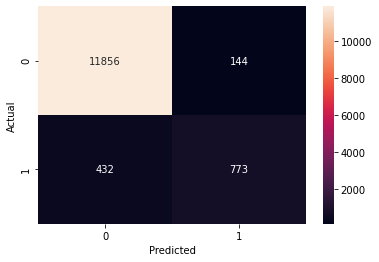

In [8]:
# Plot the confusion matrix 
sn.heatmap(confusion_matrix(y_test, y_test_pred_binary), annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### __c)__: True positive rate (recall, sensitivity)

$\frac{TP}{TP+FN}$

"Collect them all!" – High recall might give you some bad items, but it'll also return most of the good items.

In [9]:
scores = []
for t in THRESHOLDS: 
    y_test_pred_binary = [int(i >= t) for i in y_test_pred]
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_binary).ravel()
    true_positive_rate = tp / (tp + fn)
    scores.append(true_positive_rate)
    
max_t = THRESHOLDS[np.argmax(scores)]
y_test_pred_binary = [int(i >= max_t) for i in y_test_pred]
print('Maximum TPR of {}% at threshold {}'.format(round(max(scores), 2), max_t))

Maximum TPR of 1.0% at threshold 0.01


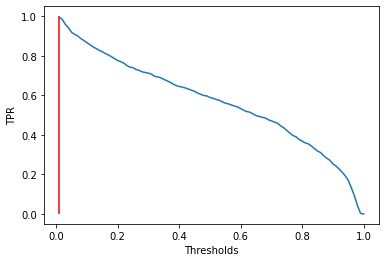

In [10]:
# Plot scores
plt.plot(THRESHOLDS, scores)
plt.vlines(max_t, ymin=0, ymax=1, color='r')
plt.xlabel('Thresholds')
plt.ylabel('TPR')
plt.show()

---

<img src="images/tpr.png" width="800" height="800" align="center"/>


### __d)__: False positive rate (Type I error)

$\frac{FP}{FP+TN}$

"False alarm!"

In [11]:
scores = []
for t in THRESHOLDS: 
    y_test_pred_binary = [int(i >= t) for i in y_test_pred]
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_binary).ravel()
    false_positive_rate = fp / (fp + tn)
    scores.append(false_positive_rate)
    
min_t = THRESHOLDS[np.argmin(scores)]
y_test_pred_binary = [int(i >= min_t) for i in y_test_pred]
print('Minimum FPR of {}% at threshold {}'.format(round(min(scores), 2), min_t))


Minimum FPR of 0.0% at threshold 0.96


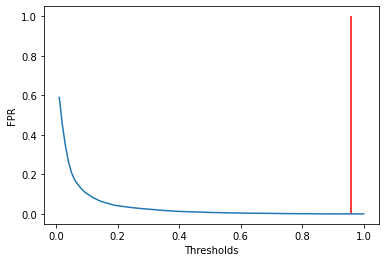

In [12]:
# Plot scores
plt.plot(THRESHOLDS, scores)
plt.vlines(min_t, ymin=0, ymax=1, color='r')
plt.xlabel('Thresholds')
plt.ylabel('FPR')
plt.show()

---

<img src="images/fpr.png" width="800" height="800" align="center"/>


### __d)__: False negative rate (Type II error)

$\frac{FN}{FN+TP}$

"Dammit, we missed it!"

In [13]:
scores = []
for t in THRESHOLDS: 
    y_test_pred_binary = [int(i >= t) for i in y_test_pred]
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_binary).ravel()
    false_negative_rate = fn / (fn + tp)
    scores.append(false_negative_rate)
    
min_t = THRESHOLDS[np.argmin(scores)]
y_test_pred_binary = [int(i >= min_t) for i in y_test_pred]
print('Minimum FNR of {}% at threshold {}'.format(round(min(scores), 2), min_t))


Minimum FNR of 0.0% at threshold 0.01


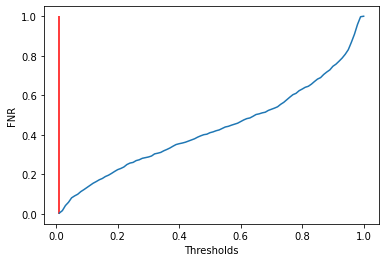

In [14]:
# Plot scores
plt.plot(THRESHOLDS, scores)
plt.vlines(min_t, ymin=0, ymax=1, color='r')
plt.xlabel('Thresholds')
plt.ylabel('FNR')
plt.show()

---

<img src="images/fnr.png" width="800" height="800" align="center"/>


### __e)__: Positive predictive value (precision)

$\frac{TP}{TP+FP}$

"Don't waste my time!" – High precision might leave some good ideas out, but what it returns is of high quality (i.e. very precise).

In [15]:
scores = []
for t in THRESHOLDS: 
    y_test_pred_binary = [int(i >= t) for i in y_test_pred]
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_binary).ravel()
    ppv = tp / (tp + fp)
    scores.append(ppv)
    
max_t = THRESHOLDS[np.argmax(scores)]
y_test_pred_binary = [int(i >= max_t) for i in y_test_pred]
print('Maximum PPV of {}% at threshold {}'.format(round(max(scores), 2), max_t))

Maximum PPV of 1.0% at threshold 1.0


<ipython-input-15-dee813ed1377>:5: RuntimeWarning: invalid value encountered in long_scalars
  ppv = tp / (tp + fp)


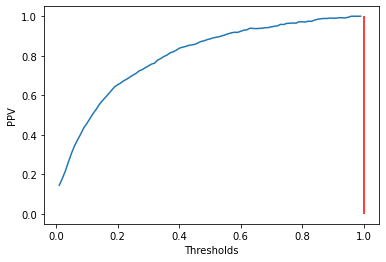

In [16]:
# Plot scores
plt.plot(THRESHOLDS, scores)
plt.vlines(max_t, ymin=0, ymax=1, color='r')
plt.xlabel('Thresholds')
plt.ylabel('PPV')
plt.show()

### __f)__: F1 score


In [17]:
scores = []
for t in THRESHOLDS: 
    y_test_pred_binary = [int(i >= t) for i in y_test_pred]
    f1 = f1_score(y_test, y_test_pred_binary)
    scores.append(f1)
    
max_t = THRESHOLDS[np.argmax(scores)]
y_test_pred_binary = [int(i >= max_t) for i in y_test_pred]
print('Maximum F1 of {}% at threshold {}'.format(round(max(scores), 2), max_t))

Maximum F1 of 0.73% at threshold 0.34


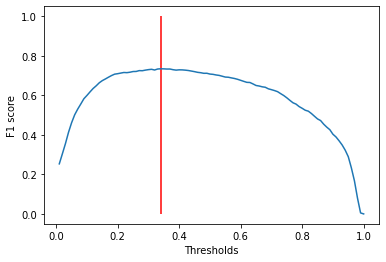

In [18]:
# Plot scores
plt.plot(THRESHOLDS, scores)
plt.vlines(max_t, ymin=0, ymax=1, color='r')
plt.xlabel('Thresholds')
plt.ylabel('F1 score')
plt.show()

---

<img src="images/f1.png" width="800" height="800" align="center"/>


## Bonus materials

- Google's Cassie Kozyrkov on precision and recall [on Youtube](https://www.youtube.com/watch?v=O4joFUqvz40)